In [1]:
import pandas as pd
import os
import re
import warnings
import time

In [4]:
from visualization import visualize_heatmap
from macro_data_processing import get_speed_mean_field
from macro_data_processing import convert_to_cst_unix

In [7]:
# Specify an input directory where raw and/or smooth speed field CSV files reside.
# The directory should contain only files pertaining to a specific time period (see below).
inception_vt_root = '/Users/worklab/Downloads/I24M_INCEPTION_v1/2022-11-28/'

# Must define start and end times for the data you are loading.
starttime = convert_to_cst_unix('2022-11-28 06:00')
endtime = convert_to_cst_unix('2022-11-28 10:00')

638450a3dd50d54aa5af0cf6__post8_speed_raw_lane1.csv


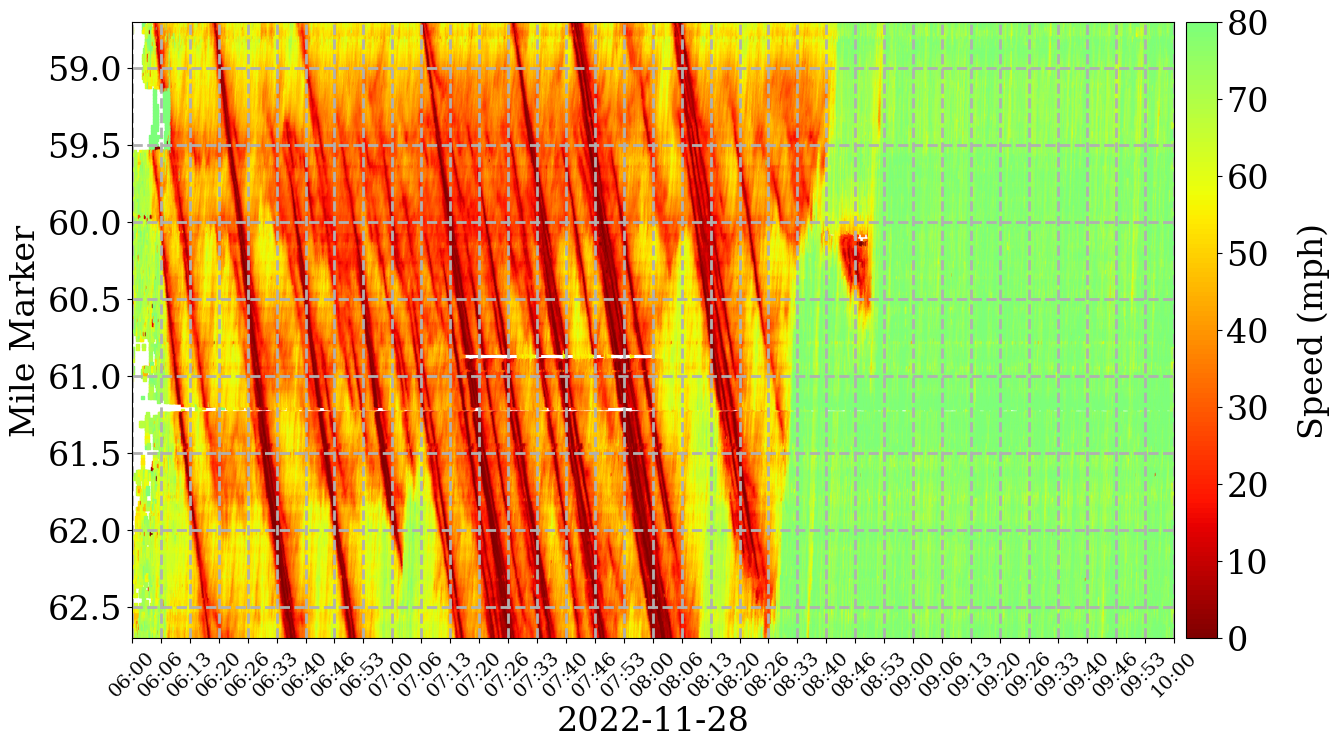

In [17]:
for filename in os.listdir(inception_vt_root):
    if os.path.splitext(filename)[1] == '.csv':
        file_path = os.path.join(inception_vt_root, filename)
        smooth_data = pd.read_csv(file_path)
        pattern = r'lane(\d+)'
        match = re.search(pattern, file_path)
        if match:
            lane_number = match.group(1)
        else:
            print("Lane number not found in the input string.")
        print(filename)
        visualize_heatmap(smooth_data, starttime, endtime, 0.02, 4, fig_width=16, fig_height=8, minor_xtick=100)
        break